# Intro to Probabilsitic Programming (

In [1]:
%pip install pytensor pymc

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.4/472.4 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9098 sha256=9e05ad3bb0b7738f0f7e2c285974626f3a6bb4b2019f81ce79a62e21097974f0
  Stored in directory: /home/jovyan/.cache/pip/wheels/95/8f/45/fe0a5b5e232401da571d514eb545833fbe220993ac8336c94e
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=139

In [70]:
import numpy as np
# Assume N trials and K successes out of those trials
# Change these numbers to see how the posterior plot changes
#trials = 500; successes = 250

np.random.seed()

p_true = 0.35

# Number of tosses
trials = 20  # Replace with your desired number of tosses

# Simulating N coin tosses
successes = np.random.binomial(N, p_true)

print(f"N tosses: {trials}, heads: {successes}")

N tosses: 20, heads: 7


In [71]:
import pymc as pm

# Set up model context
with pm.Model() as coin_flip_model:
    # Probability p of success we want to estimate
    # and assign Beta prior
    p = pm.Beta("p", alpha=1, beta=1)
    
    # Define likelihood
    obs = pm.Binomial("obs", p=p, n=trials,
        observed=successes,
    )

    # Hit Inference Button
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


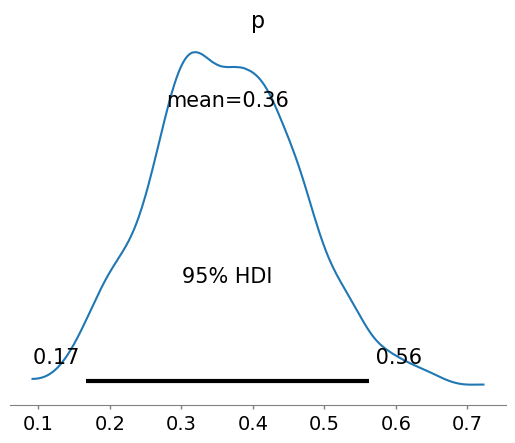

<Axes: title={'center': 'p'}>

In [72]:
import arviz as az

az.plot_posterior(idata, show=True, hdi_prob=0.95)

<Axes: title={'center': 'p'}>

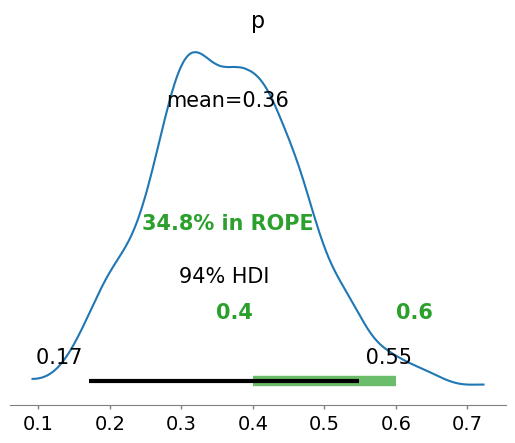

In [73]:
# ROPE: Region Of Practical Equivalence 
az.plot_posterior(idata, rope=[0.4, .6])